In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
!cd data && ls

cancer_all_types.xls                    result.csv
cervical-cancer-risk-classification.zip risk_factors_cervical_cancer.csv
data.xlsx                               tobacco.csv
dataStore.xlsx                          world.sql
file.txt


In [3]:
dataA = pd.read_excel('data/data.xlsx', sheetname=0)
dataB = pd.read_excel('data/data.xlsx', sheetname=1)

In [4]:
dataA,dataB

(     ID  Col1  Col2  Col3  Col4  Col5  Col6  Col7
 0  A001   1.4   2.4   NaN   NaN   NaN   NaN   NaN
 1  A002   2.3   2.3   4.3   NaN   NaN   NaN   NaN
 2  A003   5.7   2.8   1.2   5.2   NaN   NaN   NaN
 3  A004   7.1   2.2   NaN   NaN   NaN   NaN   NaN
 4  A005   3.2   4.3   4.2   5.5   7.4   NaN   NaN,
      ID  Col1  Col2  Col3  Col4  Col5  Col6  Col7
 0  A001   1.1   2.4   NaN   NaN   NaN   NaN   NaN
 1  A002   2.4   2.3   4.3   NaN   NaN   NaN   NaN
 2  A003   5.7   2.6   1.2   NaN   NaN   NaN   NaN
 3  A004   7.1   2.2   NaN   NaN   NaN   NaN   NaN
 4  A005   3.2   4.3   4.2   6.1   7.3   NaN   NaN)

In [22]:
# Function taking two dataframes as arguments
def compare(dfA,dfB):
    # Using loc will select just the columns with data
    dataA = dfA.loc[:,['Col1','Col2','Col3','Col4','Col5','Col6','Col7']] # Could be different columns!!!
    dataB = dfB.loc[:,['Col1','Col2','Col3','Col4','Col5','Col6','Col7']]
    
    # Iterating trough both dataframes

    # Empty list to save partial results
    results = []
    
    for i in range(0,dataB.shape[0]): 
        # Transforming each row to a List  
        a = dataA.iloc[i].values
        b = dataB.iloc[i].values
        
        # Removing nan from lists
        aCheck = [value for value in a if not math.isnan(value)]
        bCheck = [value for value in b if not math.isnan(value)]
        
        # Reducing decimals to Two
        def rounding(list):
            newList = []
            for x in list:
                newList.append(float("{0:.1f}".format(x)))    
            return newList
        
        y = len(set(rounding(aCheck)).intersection(rounding(bCheck)))
        w = len(rounding(aCheck)) + len(rounding(bCheck))
                                              
        result = (y*2)/w ### Improve formula !!!!
        
        results.append(float("{0:.3f}".format(result)))
    
    # Creating a Series from a list
    r = pd.Series(results)
    
    # Merging original dataframes
    merging = pd.merge(dfA, dfB, on='ID')
    
    # Concatenating original Dataframes with our new Series
    conc = pd.concat([merging, r], axis=1)
    
    # Changing column name to %, setting index on ID, and saving to CSV
    conc.rename(columns={0: '%'}, inplace=True)
    conc.set_index('ID',inplace=True)
    conc.to_csv('data/result.csv',sep=',')
    
    # Finally returning our original dataframes concatenated with the new column
    return conc
        

# calling the function using our two dataframes
# it will print the percentaje for each row
compare(dataA,dataB)

,Col1_x,Col2_x,Col3_x,Col4_x,Col5_x,Col6_x,Col7_x,Col1_y,Col2_y,Col3_y,Col4_y,Col5_y,Col6_y,Col7_y,%
ID,,,,,,,,,,,,,,,
A001,1.4,2.4,NaN,NaN,NaN,NaN,NaN,1.1,2.4,NaN,NaN,NaN,NaN,NaN,0.500
A002,2.3,2.3,4.3,NaN,NaN,NaN,NaN,2.4,2.3,4.3,NaN,NaN,NaN,NaN,0.667
A003,5.7,2.8,1.2,5.2,NaN,NaN,NaN,5.7,2.6,1.2,NaN,NaN,NaN,NaN,0.571
A004,7.1,2.2,NaN,NaN,NaN,NaN,NaN,7.1,2.2,NaN,NaN,NaN,NaN,NaN,1.000
A005,3.2,4.3,4.2,5.5,7.4,NaN,NaN,3.2,4.3,4.2,6.1,7.3,NaN,NaN,0.600


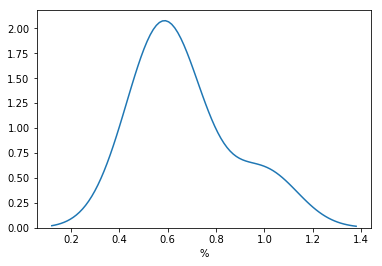

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

histo = sns.distplot(compare(dataA,dataB)['%'], bins=5, hist=False)

In [6]:
! cd data && ls

cancer_all_types.xls                    result.csv
cervical-cancer-risk-classification.zip risk_factors_cervical_cancer.csv
data.xlsx                               tobacco.csv
dataStore.xlsx                          world.sql
file.txt


In [7]:
final = pd.read_csv('data/result.csv', sep=',')
final['%']

0    0.500
1    0.667
2    0.500
3    1.000
4    0.571
Name: %, dtype: float64